In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
PL_19_20_df = pd.read_csv('2019_2020_Player_Stats.csv', skiprows=1)
PL_18_19_df = pd.read_csv('2018_2019_Player_Stats.csv', skiprows=1)
PL_17_18_df = pd.read_csv('2017_2018_Player_Stats.csv', skiprows=1)

In [3]:
PL_19_20_df.head()

,Rk,Player▲,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


### Clean up datasets

In [4]:
#clean up 19-20
PL_19_20_df = PL_19_20_df.rename(columns={"Player▲": "Player"})
PL_19_20_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [5]:
player_name_split = PL_19_20_df['Player'].str.split('\\')
player_name_split

0        [Patrick van Aanholt, Patrick-van-Aanholt]
1                          [Max Aarons, Max-Aarons]
2                    [Tammy Abraham, Tammy-Abraham]
3                            [Che Adams, Che-Adams]
4                                  [Adrián, Adrian]
                           ...                     
483                  [Wilfried Zaha, Wilfried-Zaha]
484    [Christoph Zimmermann, Christoph-Zimmermann]
485      [Oleksandr Zinchenko, Oleksandr-Zinchenko]
486                        [Kurt Zouma, Kurt-Zouma]
487                        [Mesut Özil, Mesut-Ozil]
Name: Player, Length: 488, dtype: object

In [6]:
player_names = player_name_split.map(lambda _:_[0])
player_names

0       Patrick van Aanholt
1                Max Aarons
2             Tammy Abraham
3                 Che Adams
4                    Adrián
               ...         
483           Wilfried Zaha
484    Christoph Zimmermann
485     Oleksandr Zinchenko
486              Kurt Zouma
487              Mesut Özil
Name: Player, Length: 488, dtype: object

In [7]:
PL_19_20_df['Player'] = player_names
PL_19_20_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [8]:
#nation_split = PL_19_20_df['Nation'].str.split(' ', 1, expand=True)

In [9]:
#nation_split.rename(columns={0: 'A', 1: 'B'}, inplace=True)

In [10]:
#nation_split.drop(columns={'A'})

In [11]:
#PL_19_20_df['Nation'] = nation_split['B']

In [12]:
PL_19_20_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
PL_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [23]:
position_counts = PL_19_20_df.Pos.value_counts()
position_counts

DF    176
MF    166
FW    110
GK     36
Name: Pos, dtype: int64

In [14]:
position_split = PL_19_20_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_19_20_df["Pos"] = PL_19_20_df["Pos"].apply(change_string)
PL_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12
486,Kurt Zouma,DF,Chelsea,21,18,1713.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.2,0.03,0.01,0.04,0.03,0.04


In [27]:
GK_19_20_df = PL_19_20_df[PL_19_20_df['Pos']=='GK']
GK_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
11,Alisson,GK,Liverpool,19,19,1644.0,0,1,0,0,...,0.0,0.05,0.0,0.0,0.4,0.0,0.02,0.02,0.0,0.02
22,Kepa Arrizabalaga,GK,Chelsea,24,24,2160.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
58,Claudio Bravo,GK,Manchester City,4,3,346.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
63,Willy Caballero,GK,Chelsea,3,3,270.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00


In [29]:
FMD_19_20_df = PL_19_20_df[PL_19_20_df['Pos']!='GK']
FMD_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
5,Sergio Agüero,FW,Manchester City,21,16,1342.0,16,3,2,3,...,0.94,1.14,13.3,11.0,2.5,0.89,0.17,1.06,0.74,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12
486,Kurt Zouma,DF,Chelsea,21,18,1713.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.2,0.03,0.01,0.04,0.03,0.04


In [30]:
FMD_19_20_df.to_csv(r'outfield_19_20.csv')

In [15]:
#clean up 18-19
PL_18_19_df = PL_18_19_df.rename(columns={"Player▲": "Player"})
player_name_split = PL_18_19_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
PL_18_19_df['Player'] = player_names
#nation_split = PL_18_19_df['Nation'].str.split(' ', 1, expand=True)

In [21]:
#nation_split.rename(columns={0: 'A', 1: 'B'}, inplace=True)
#nation_split.drop(columns={'A'})
#PL_18_19_df['Nation'] = nation_split['B']
PL_18_19_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
position_split = PL_18_19_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_18_19_df["Pos"] = PL_18_19_df["Pos"].apply(change_string)
PL_18_19_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,36,36,3198.0,3,2,0,0,...,0.08,0.14,2.9,2.9,4.0,0.08,0.11,0.19,0.08,0.19
1,Sergio Agüero,FW,Manchester City,33,31,2480.0,21,8,2,2,...,0.69,0.98,20.3,18.8,5.2,0.74,0.19,0.93,0.68,0.87
2,Nathan Aké,DF,Bournemouth,38,38,3412.0,4,0,0,0,...,0.11,0.11,3.5,3.5,0.7,0.09,0.02,0.11,0.09,0.11
3,Marc Albrighton,FW,Leicester City,27,18,1626.0,2,2,0,0,...,0.11,0.22,1.0,1.0,2.9,0.05,0.16,0.21,0.05,0.21
4,Toby Alderweireld,DF,Tottenham,34,33,2923.0,0,0,0,0,...,0.00,0.00,1.3,1.3,0.5,0.04,0.02,0.05,0.04,0.05


In [31]:
FMD_18_19_df = PL_18_19_df[PL_18_19_df['Pos']!='GK']
FMD_18_19_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,36,36,3198.0,3,2,0,0,...,0.08,0.14,2.9,2.9,4.0,0.08,0.11,0.19,0.08,0.19
1,Sergio Agüero,FW,Manchester City,33,31,2480.0,21,8,2,2,...,0.69,0.98,20.3,18.8,5.2,0.74,0.19,0.93,0.68,0.87
2,Nathan Aké,DF,Bournemouth,38,38,3412.0,4,0,0,0,...,0.11,0.11,3.5,3.5,0.7,0.09,0.02,0.11,0.09,0.11
3,Marc Albrighton,FW,Leicester City,27,18,1626.0,2,2,0,0,...,0.11,0.22,1.0,1.0,2.9,0.05,0.16,0.21,0.05,0.21
4,Toby Alderweireld,DF,Tottenham,34,33,2923.0,0,0,0,0,...,0.00,0.00,1.3,1.3,0.5,0.04,0.02,0.05,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Andre-Frank Zambo Anguissa,MF,Fulham,22,16,1518.0,0,0,0,0,...,0.00,0.00,0.8,0.8,0.3,0.05,0.02,0.06,0.05,0.06
504,Davide Zappacosta,DF,Chelsea,4,1,125.0,0,0,0,0,...,0.00,0.00,0.1,0.1,0.1,0.05,0.11,0.15,0.05,0.15
505,Oleksandr Zinchenko,DF,Manchester City,14,14,1153.0,0,3,0,0,...,0.00,0.23,0.2,0.2,1.2,0.01,0.10,0.11,0.01,0.11
506,Kenneth Zohore,FW,Cardiff City,19,7,746.0,1,1,0,0,...,0.12,0.24,1.8,1.8,1.0,0.22,0.12,0.34,0.22,0.34


In [32]:
FMD_18_19_df.to_csv(r'outfield_18_19.csv')

In [22]:
#clean up17-18
PL_17_18_df = PL_17_18_df.rename(columns={"Player▲": "Player"})
player_name_split = PL_17_18_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
PL_17_18_df['Player'] = player_names
PL_17_18_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
position_split = PL_17_18_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_17_18_df["Pos"] = PL_17_18_df["Pos"].apply(change_string)
PL_17_18_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,28,25,2184,5,1,0,0,...,0.21,0.25,3.4,3.4,1.7,0.14,0.07,0.21,0.14,0.21
1,Rolando Aarons,MF,Newcastle Utd,4,1,139,0,0,0,0,...,0.00,0.00,0.2,0.2,0.0,0.12,0.00,0.12,0.12,0.12
2,Tammy Abraham,FW,Swansea City,31,15,1726,6,1,0,0,...,0.31,0.37,6.4,6.4,0.8,0.33,0.04,0.38,0.33,0.38
3,Charlie Adam,MF,Stoke City,11,5,411,0,0,0,1,...,0.00,0.00,1.4,0.6,1.4,0.30,0.32,0.62,0.13,0.45
4,Adrián,GK,West Ham,19,19,1710,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [ ]:
FMD_17_18_df = PL_17_18_df[PL_17_18_df['Pos']!='GK']
FMD_17_18_df.to_csv(r'outfield_17_18.csv')

### Machine learning model

In [18]:
#expected goal
expected_goals_count = PL_19_20_df['xG'].value_counts()
expected_goals_count

0.0     108
0.1      34
0.2      32
0.6      28
0.3      21
       ... 
4.8       1
10.8      1
13.1      1
3.1       1
6.9       1
Name: xG, Length: 78, dtype: int64

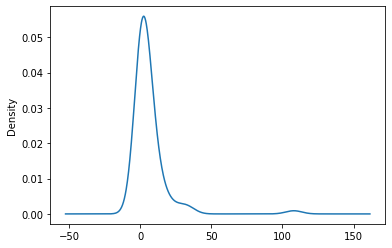

In [19]:
# Visualize the value counts
expected_goals_count.plot.density()